# Análisis NLP con Spacy: Harry Potter y la piedra filosofal (pelicula)

Por: [Leonardo Genzano](https://www.linkedin.com/in/leonardo-genzano-1b275193/)

Estaremos utilizando Spacy para hacer un análisis simple de NLP (Natural Language Processing) a la primer pelicula de Harry Potter.<br>
NLP se usa para muchisimas cosas, por ejemplo reconocimiento de texto, traducción automatica, generación de lenguaje,resumen de textos, deteccion de sentimientos, etc. <br>
<br>
Los datos de entrada contienen:<br>
* Character: personaje que está hablando
* Sentence: su diálogo

Consideraciones:
* los datos están en inglés
* para ver el código, presiona el botón Code que esta arriba a la derecha de cada visualización. Lo oculto para que no se haga largo el notebook
* voy a estar utilizando algunas funciones de Spacy, que es una biblioteca muy completa para hacer análisis NLP. https://spacy.io/usage
* Este notebook no fue realizado por un experto. Seguramente haya mejores maneras de afrontar las mismas problematicas. Quedo atento a cualquier comentario o sugerencia 

![The kaggle logo][1]
[1]: https://i.pinimg.com/originals/15/17/d7/1517d762a06a0a6b84f1b58b71b50a24.jpg

In [1]:
pip install funpymodeling

     |████████████████████████████████| 215 kB 3.5 MB/s 
     |████████████████████████████████| 11.6 MB 15.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 2.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pandas-profiling 2.6.0 requires matplotlib>=3.2.0, but you'll have matplotlib 3.1.3 which is incompatible.
osmnx 0.15.1 requires matplotlib>=3.2, but you'll have matplotlib 3.1.3 which is incompatible.
funpymodeling 0.1.7 requires matplotlib<4.0.0,>=3.2.2, but you'll have matplotlib 3.1.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from funpymodeling.exploratory import freq_tbl, status, profiling_num, cat_vars, num_vars
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
from IPython.display import YouTubeVideo

In [4]:
import spacy
#import random
#from collections import Counter #for counting
plt.style.use('seaborn')
sns.set(font_scale=2)
#import json
#def pretty_print(pp_object):
  #  print(json.dumps(pp_object, indent=2))

In [5]:
#!python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')
# python -m spacy download en_vectors_web_lg

**************************

# Preparación de datos

In [6]:
with open('../input/harry-potter-dataset/Harry Potter 1.csv', 'r', errors='ignore') as file:
    data = file.read()

In [7]:
#convierto string a df
df = pd.DataFrame([x.split(';') for x in data.split('\n')])
#agrego headers y elimino primera fila
df= df.rename(columns={0 : "Character",  1: "Sentence" })
df= df.drop([0])
df = df.reset_index(drop=True)

In [8]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Character,0,0.000000,0,0.0,94,object
1,Sentence,4,0.002514,0,0.0,1551,object


In [9]:
df[df["Sentence"].isnull()  ]

,Character,Sentence
217,"either an owl, a cat or a toad.""",None
615,"""",None
1111,"""",None
1590,,None


In [10]:
df.loc[216,'Sentence'] = "All students must be equipped with one standard size 2 pewter cauldron and may bring, if they desire, either an owl, a cat or a toad."

In [11]:
df= df.drop([217,615,1111,1590])
df = df.reset_index(drop=True)

In [12]:
#Viendo los valores unicos de "Character", vemos que algunos strings estan "duplicados". 
# Esto sucede porque en algunos registros, el nombre del personaje aparece con espacios al final
# entonces lo solusionamos asi:
df["Character"]=df["Character"].str.strip()

In [13]:
#df.to_csv('HP.csv', index=False, sep =';')

**********************

# Análisis NLP con Spacy

# General

In [14]:
# Creamos objeto doc
text=df['Sentence'].str.cat(sep=' ')
doc = nlp(text)

****¿Qué personaje tiene más lineas?****

In [15]:
freq_tbl(df["Character"]).head(10)

,Character,frequency,percentage,cumulative_perc
0,Harry,330,0.207940,0.207940
1,Hagrid,215,0.135476,0.343415
2,Ron,210,0.132325,0.475740
3,Hermione,170,0.107120,0.582861
4,Dumbledore,75,0.047259,0.630120
5,McGonagall,64,0.040328,0.670447
6,Petunia,45,0.028355,0.698803
7,Vernon,37,0.023314,0.722117
8,Malfoy,36,0.022684,0.744802
9,Quirrell,36,0.022684,0.767486


****¿Cuántas veces se nombra a la escuela Hogwarts?****

In [16]:
data.count("Hogwarts")

23

****¿Cuál es la casa más nombrada? (a que ya saben el resultado..)****

In [17]:
HP_houses = []
for token in doc:
    if  (token.text == "Slytherin" or token.text =="Ravenclaw" or token.text =="Gryffindor" or token.text =="Hufflepuff"):
        HP_houses.append(token)
        
HP_houses = [str(x) for x in HP_houses]


In [18]:
df_houses = pd.DataFrame(HP_houses, columns=["HP_houses"])

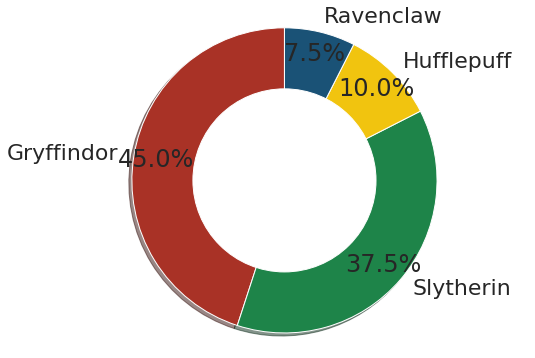

In [19]:
labels = ['Gryffindor','Slytherin','Hufflepuff','Ravenclaw']
sizes = df_houses.value_counts().values
colors = ['#A93226','#1E8449','#F1C40F','#1A5276']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors,pctdistance=0.85,
        shadow=True, startangle=90)

#draw internal circle
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

#https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f


In [20]:
freq_tbl(HP_houses)

,0,frequency,percentage,cumulative_perc
0,Gryffindor,18,0.450,0.450
1,Slytherin,15,0.375,0.825
2,Hufflepuff,4,0.100,0.925
3,Ravenclaw,3,0.075,1.000


****Personas más nombradas****

In [21]:
HP_persons = []
for token in doc:
    if  ( token.ent_type_ == "PERSON" ):
        HP_persons.append(token)
        
HP_persons = [str(x) for x in HP_persons]


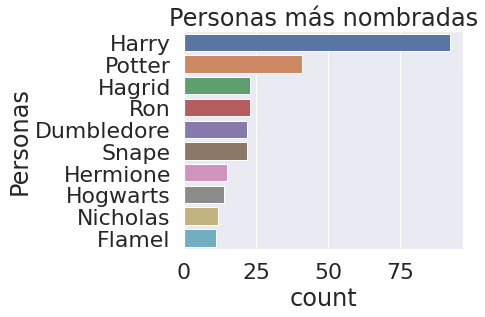

In [22]:
df_persons = pd.DataFrame(HP_persons, columns=["Personas"])
df_persons
plt.figure(figsize=(5,4))
sns.countplot(y="Personas",
             data=df_persons,
             order=df_persons["Personas"].value_counts().iloc[:10].index)
plt.title("Personas más nombradas")
plt.show()



****¿Cuáles son los sustantivos más utilizados?****

In [23]:
hp_nouns = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        hp_nouns.append(token)
        
hp_nouns = [str(x) for x in hp_nouns]

In [24]:
df_nouns = pd.DataFrame(hp_nouns, columns=["Sustantivos"])

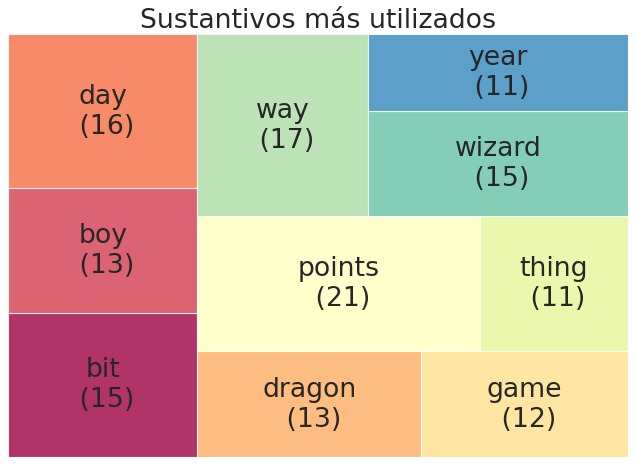

In [25]:
#filtro los datos para que el grafico tenga más sentido. 
data_treemap = df_nouns.groupby("Sustantivos").filter(lambda x: len(x) > 10)


# Prepare Data
dftreemap = data_treemap.groupby('Sustantivos').size().reset_index(name='counts')
labels = dftreemap.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dftreemap['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,7), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Sustantivos más utilizados')
plt.axis('off')
plt.show()

****¿Cuales son los adjetivos más utilizados?****

In [26]:
HP_adjs = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "ADJ") and (len(str(token))>2):
        HP_adjs.append(token)
        
HP_adjs = [str(x) for x in HP_adjs]

In [27]:
df_adjs = pd.DataFrame(HP_adjs, columns=["Adjetivos"])

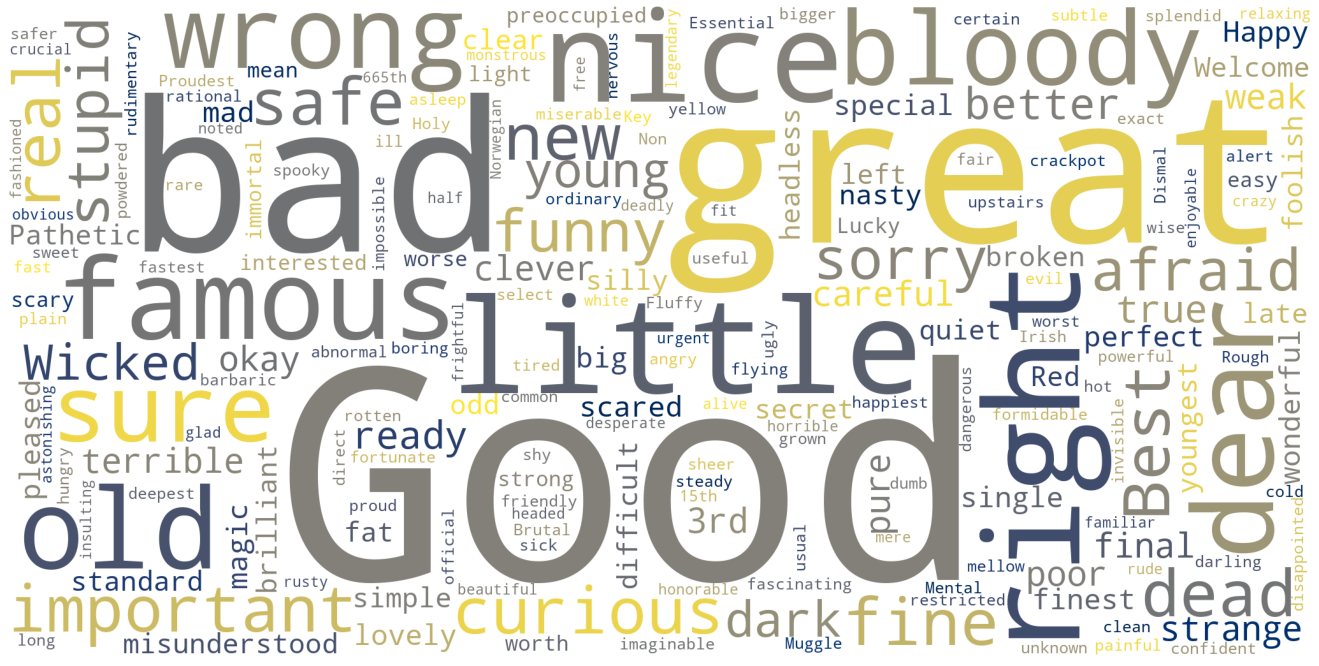

In [28]:
from wordcloud import WordCloud
words = [i for i in df_adjs["Adjetivos"]]
    
words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='white',
    colormap="cividis",
                          width=2048,
                          height=1024
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

# Análisis Harry Potter (personaje)

<img src="https://media1.tenor.com/images/2d7bfb9b3e6170a5a63605fb5c913e8f/tenor.gif?itemid=10629771">

In [29]:
textHarry = df[df.Character == "Harry"]['Sentence'].str.cat(sep=' ')
docHarry = nlp(textHarry)

****¿Cuáles son las personas más nombradas por Harry?****

In [30]:
harry_persons = []
for token in docHarry:
    if  ( token.ent_type_ == "PERSON" ):
        harry_persons.append(token)
        
harry_persons = [str(x) for x in harry_persons]

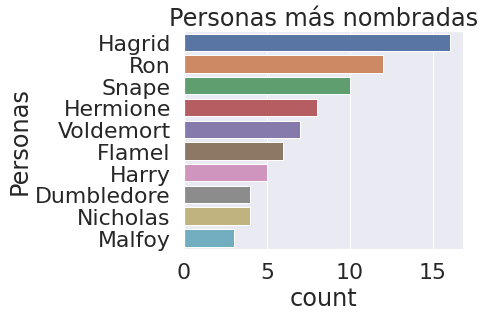

In [31]:
df_persons_harry = pd.DataFrame(harry_persons, columns=["Personas"])
df_persons
plt.figure(figsize=(5,4))
sns.countplot(y="Personas",
             data=df_persons_harry,
             order=df_persons_harry["Personas"].value_counts().iloc[:10].index)
plt.title("Personas más nombradas")
plt.show()

****¿Cuales son los adjetivos más utilizados por Harry?****

In [32]:
harry_adjs = []
for token in docHarry:
    if (not token.is_stop) and (token.pos_ == "ADJ")  and (len(str(token))>2):
        harry_adjs.append(token)
        
harry_adjs = [str(x) for x in harry_adjs]

In [33]:
df_adjs_Harry = pd.DataFrame(harry_adjs, columns=["Adjetivos"])

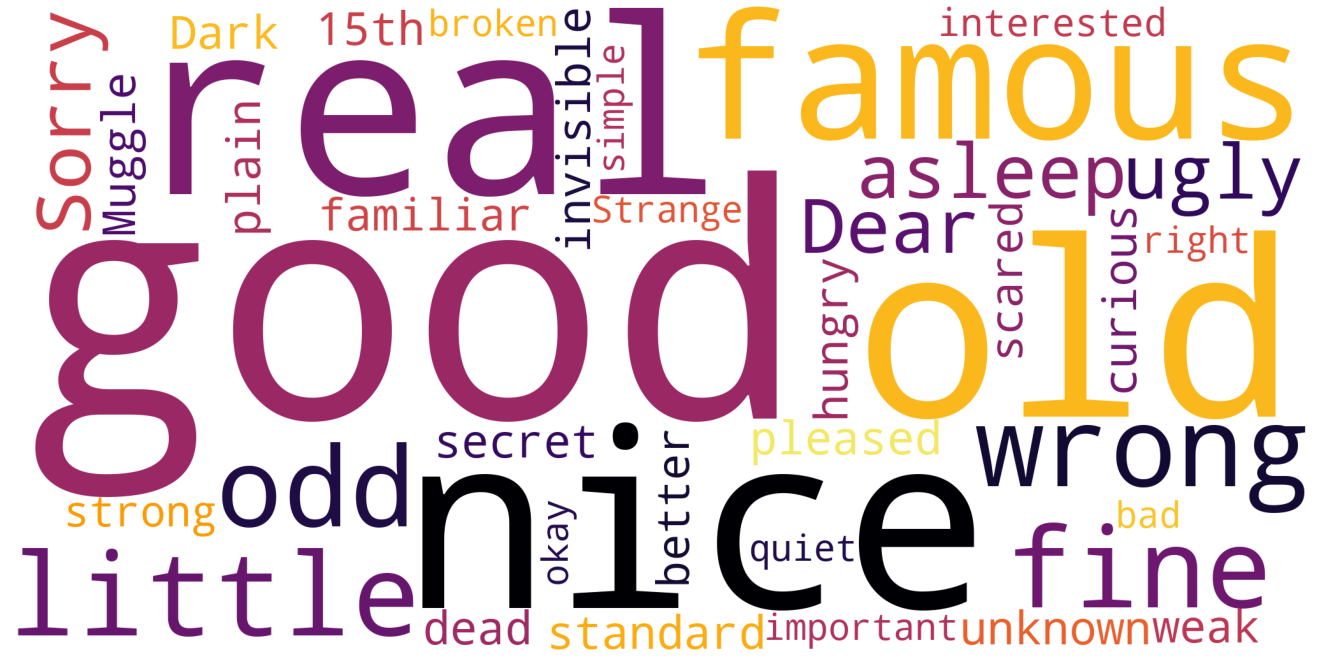

In [34]:
from wordcloud import WordCloud
words = [i for i in df_adjs_Harry["Adjetivos"]]
    
words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='white',
    colormap="inferno",
                          width=2048,
                          height=1024
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

# Análisis Draco Malfoy

<img src="https://i.pinimg.com/originals/38/e8/f2/38e8f2dfda8036deede516016df545bc.gif">



In [35]:
textMalfoy = df[df.Character == "Malfoy"]['Sentence'].str.cat(sep=' ')

docMalfoy = nlp(textMalfoy)

****¿Cuáles son las personas más nombradas por Draco?****

In [36]:
malfoy_persons = []
for token in docMalfoy:
    if  ( token.ent_type_ == "PERSON" ):
        malfoy_persons.append(token)
        
malfoy_persons = [str(x) for x in malfoy_persons]

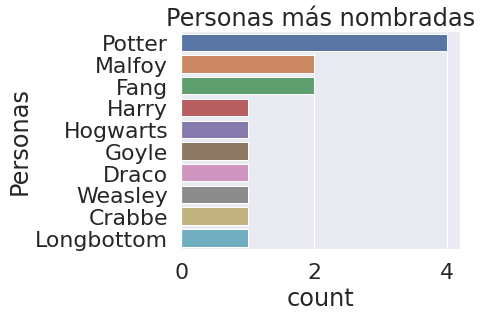

In [37]:
df_persons_malfoy = pd.DataFrame(malfoy_persons, columns=["Personas"])
df_persons
plt.figure(figsize=(5,4))
sns.countplot(y="Personas",
             data=df_persons_malfoy,
             order=df_persons_malfoy["Personas"].value_counts().iloc[:10].index)
plt.title("Personas más nombradas")
plt.show()

****¿Cuales son los adjetivos más utilizados por Draco Malfoy?****

In [38]:
Malfoy_adjs = []
for token in docMalfoy:
    if (not token.is_stop) and (token.pos_ == "ADJ")  and (len(str(token))>2):
        Malfoy_adjs.append(token)
        
Malfoy_adjs = [str(x) for x in Malfoy_adjs]

In [39]:
df_adjs_Malfoy = pd.DataFrame(Malfoy_adjs, columns=["Adjetivos"])

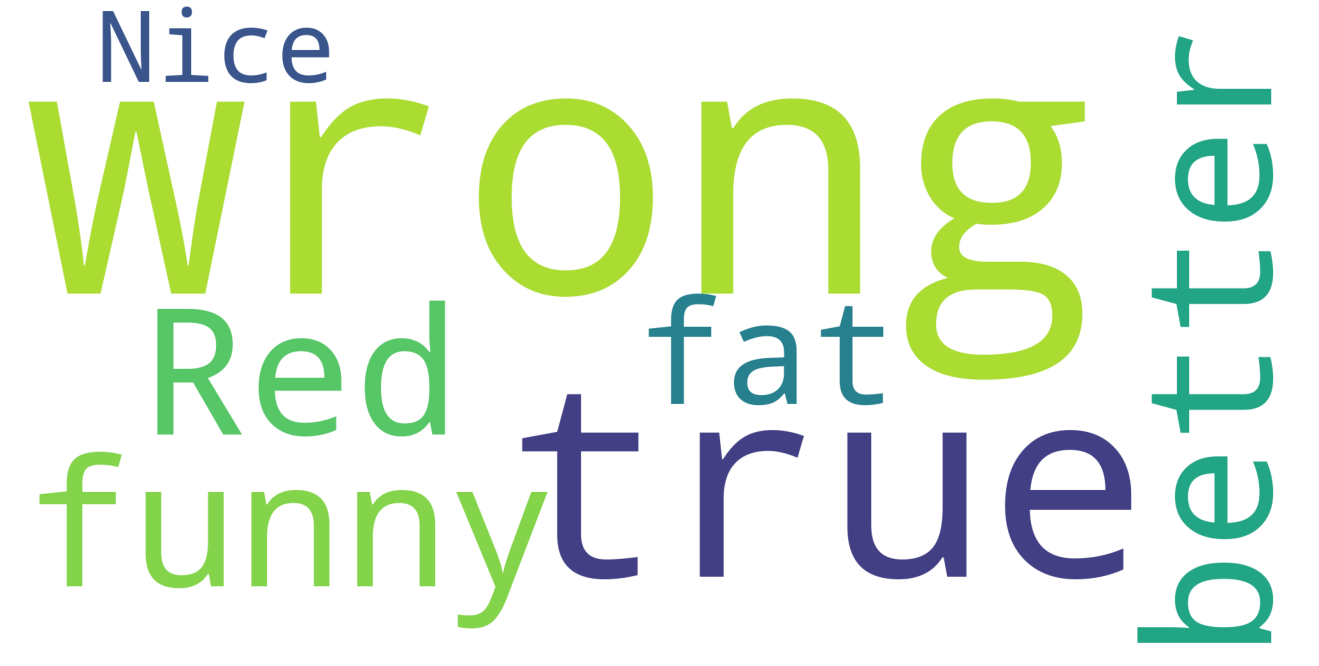

In [40]:
from wordcloud import WordCloud
words = [i for i in df_adjs_Malfoy["Adjetivos"]]
    
words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='white',
    colormap="viridis",
                          width=2048,
                          height=1024
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

# Análisis Dumbledore

<img src="https://i.imgur.com/3a9el.gif?noredirect">

In [41]:
textDumbledore = df[df.Character == "Dumbledore"]['Sentence'].str.cat(sep=' ')
docDumbledore = nlp(textDumbledore)

****¿Cuales son las personas más nombradas por Dumbledore?****

In [42]:
Dumbledore_persons = []
for token in docDumbledore:
    if (token.ent_type_ == "PERSON") :
        Dumbledore_persons.append(token)
        
Dumbledore_persons = [str(x) for x in Dumbledore_persons]


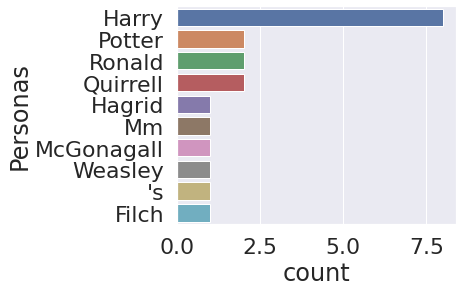

In [43]:
df_person_Dumbledore = pd.DataFrame(Dumbledore_persons, columns=["Personas"])
df_person_Dumbledore
plt.figure(figsize=(5,4))
sns.countplot(y="Personas",
             data=df_person_Dumbledore,
             order=df_person_Dumbledore["Personas"].value_counts().iloc[:10].index)
plt.show()

****¿Cuales son los adjetivos más utilizados por Dumbledore?****

In [44]:
Dumbledore_adjs = []
for token in docDumbledore:
    if (not token.is_stop) and (token.pos_ == "ADJ")  and (len(str(token))>2):
        Dumbledore_adjs.append(token)
        
Dumbledore_adjs = [str(x) for x in Dumbledore_adjs]

In [45]:
df_adjs_Dumbledore = pd.DataFrame(Dumbledore_adjs, columns=["Adjetivos"])

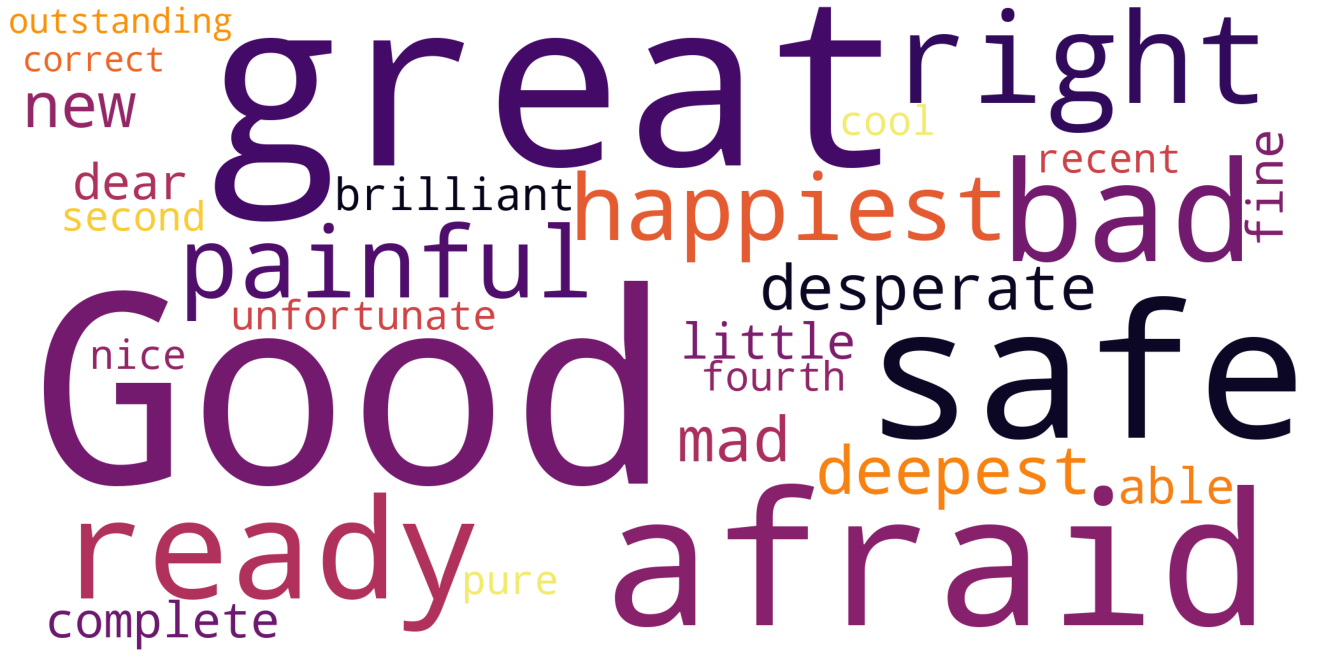

In [46]:
from wordcloud import WordCloud
words = [i for i in df_adjs_Dumbledore["Adjetivos"]]
    
words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='white',
    colormap="inferno",
                          width=2048,
                          height=1024
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

# Análisis Severus Snape

<img src="https://media1.tenor.com/images/7806f69d9655adc2d541b3e6aa301912/tenor.gif?itemid=4874386">

In [47]:
textSnape = df[df.Character == "Snape"]['Sentence'].str.cat(sep=' ')
docSnape = nlp(textSnape)

****¿Cuales son las personas más nombradas por Snape?****

In [48]:
Snape_persons = []
for token in docSnape:
    if (token.ent_type_ == "PERSON") :
        Snape_persons.append(token)
        
Snape_persons = [str(x) for x in Snape_persons]


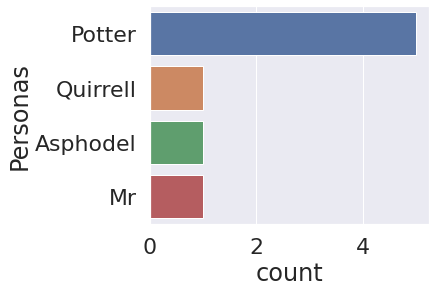

In [49]:
df_persons_Snape = pd.DataFrame(Snape_persons, columns=["Personas"])
df_persons_Snape
plt.figure(figsize=(5,4))
sns.countplot(y="Personas",
             data=df_persons_Snape,
             order=df_persons_Snape["Personas"].value_counts().iloc[:10].index)
plt.show()

****¿Cuáles son los adjetivos mas usados por Snape? (Snape siendo Snape)****

In [50]:
HP_adjs_snape = []
for token in docSnape:
    if (not token.is_stop) and (token.pos_ == "ADJ") and (len(str(token))>2):
        HP_adjs_snape.append(token)
        
HP_adjs_snape = [str(x) for x in HP_adjs_snape]

In [51]:
df_adjs_snape = pd.DataFrame(HP_adjs_snape, columns=["Adjetivos"])

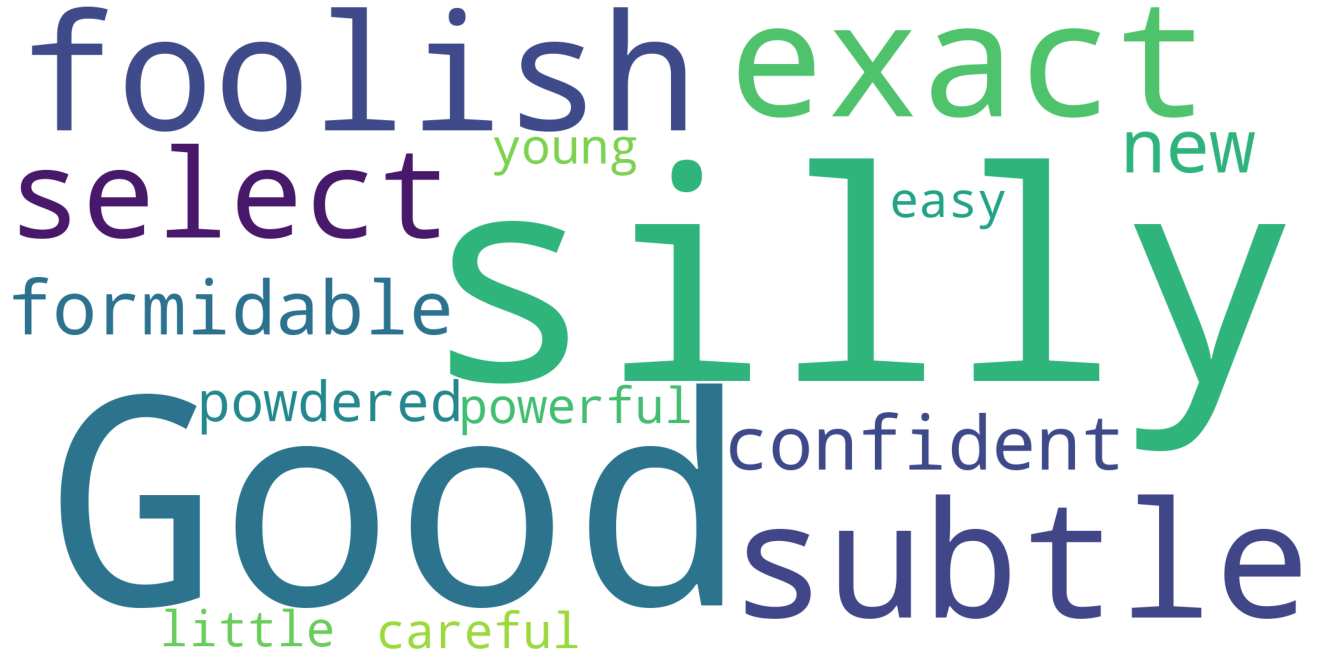

In [52]:
from wordcloud import WordCloud
words = [i for i in df_adjs_snape["Adjetivos"]]
    
words = " ".join(words)

plt.subplots(figsize=(28,12))
wordcloud = WordCloud(
                          background_color='white',
    colormap="viridis",
                          width=2048,
                          height=1024
                          ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
#plt.savefig('graph.png')

plt.show()

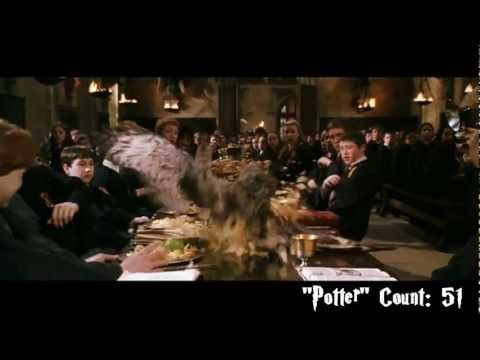

In [53]:
YouTubeVideo('2pCaH0hER9A', width=800, height=450)

# Proximos pasos:<br>
* Seguir con los análisis de otras peliculas de la saga
* Analizar varias peliculas a la vez (esto sería muy interesante)
* Detección de sentimiento

<img src="https://thumbs.gfycat.com/GrandImmaculateCreature-small.gif">